### Assignment
In this project you must create a web service that uses machine learning to make pre-dictions based on the data setpowerproductionavailable on Moodle.  
The goal is toproduce a model that accurately predicts wind turbinepoweroutput from windspeedvalues, 
as in the data set.  You must then develop a web service that will respond withpredicted power values 
based on speed values sent as HTTP requests.  Your submissionmust be in the form of a git repository containing,
at a minimum, the following items
    
1.  Jupyter  notebook  that  trains  a  model  using  the  data  set.   In  the  notebook  youshould explain your model and give an analysis of its accuracy.
2.  Python script that runs a web service based on the model, as above.
3.  Dockerfile to build and run the web service in a container.
4.  Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more thanone model.  Rest assured, all the above concepts will be explored in lecture videos andother materials in the coming semester


# Power production
The powerproduction dataset contains speed(x) and power values(y) . The data set contains 500 cases so a scatter 
plot will be used to represent the data in a visual manner.

In [26]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt


In [27]:
# Seabord plots
sb.set()

# Find and read the powerproduction dataframe
data = pd.read_csv('powerproduction.csv')
df = pd.DataFrame(data)
df


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


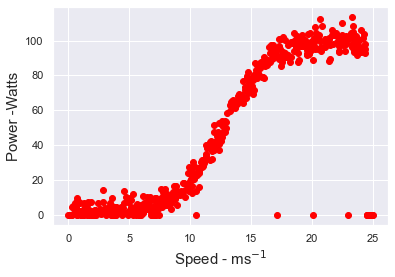

In [28]:
# X and y values for regression
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Plot the data in a scatterplot
def scatter_plot(X, y):
    # scatter plot of data set
    plt.scatter(X, y, color="red");
    
    # the x label of plot
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15)
    
    # the y label of plot
    plt.ylabel("Power -Watts", fontsize=15)
    
    
scatter_plot(X, y)

The scatter plots shows a few outliers present in the dataset. These outliers are an example of a possible human error.
To avoid these points from skewing our data and decreaseing it's accuracy they will be removed. While these means the 
data set is slightly smaller it gives us a more accurate set to work with.

In [29]:
# Locate data points where speed is > 10 and power is = 0
data.loc[(data['power'] == 0 ) & (data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


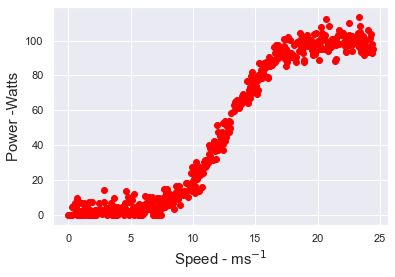

In [30]:
# New more accurate dataset to work with
data = data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
X = X.reshape(-1, 1)
scatter_plot(X, y)

# Training and Testing Data Sets

The DecisionTreeRegressor import from the sklearn package randomly split up the data set into two
sepearte sets. One for training on, one for testing on. Since it is important to train with a good
spread of values it is better to randomly choose points for each data set. 

It's better to have a larger training set, this can be programmed with the test_size parameter. For this 
training I will be setting the test data set to be 20% of the total dataset

In [31]:
# decision tree regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# train_test_splito n dataset, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create regressor and fit it to training data
regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);

NameError: name 'metrics' is not defined